## Imports

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None, 'display.max_columns', None)

import math
import scipy
import time
import datetime as dt

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

import seaborn as sns
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [55]:
from sklearn.model_selection import train_test_split

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
# Google Drive path
path = '/content/drive/My Drive/NYCDSA/lending_club/'  

Mounted at /content/drive


## Load accepted loans

In [4]:
tic = time.time()
source_df = pd.read_csv(path+'data/'+'datasets_902_370089_accepted_2007_to_2018Q4.csv.gz', 
                        compression='gzip')
print(f'Loaded in {time.time()-tic:.2f}')

Loaded in 45.66


In [5]:
df = source_df.copy()
df.shape

(2260701, 151)

In [6]:
# check the dtypes
df.dtypes.reset_index()

,index,0
0,id,object
1,member_id,float64
2,loan_amnt,float64
3,funded_amnt,float64
4,funded_amnt_inv,float64
5,term,object
6,int_rate,float64
7,installment,float64
8,grade,object
9,sub_grade,object


In [7]:
# All member_id are NaN, depersonalized. URLs are useless, drop both
df.drop(['member_id', 'url'], inplace=True, axis=1)

# inspect the actual records
df.sample(3).T

,1852725,2025858,1719819
id,4546723,84174705,97212129
loan_amnt,4000,3000,14000
funded_amnt,4000,3000,14000
funded_amnt_inv,4000,3000,14000
term,36 months,36 months,36 months
int_rate,15.8,9.49,15.99
installment,140.24,96.09,492.13
grade,C,B,C
sub_grade,C3,B2,C5
emp_title,Restaurant Runner,Resource Manager,Materials Manager


'id' is an object b/c there are 33 'Subtotal' fields, which must be removed

In [8]:
# same 33 records have NaN 'term':
print(len(df[df.term.isna()]))
df[df.term.isna()].sample(2)

33


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
1751196,Total amount funded in policy code 1: 1437969475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421095,Total amount funded in policy code 1: 6417608175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# remove these 33 records
df= df[~df.term.isna()]
df.shape

(2260668, 149)

## Select relevant fields

In the loan default/survival prediction context, select only features that are:
- known at loan origination
- static, i.e. are not updated later

Among the features we kept, there are a few that are clearly irrelevant to the prediction task ('member_id') but useful for reference purposes. There are some others such as 'zip_code' for which we decided to make a data-driven conclusion as opposed to pre-select.


Target for classification:
- loan_status

Targets for regression: survival time, realized return.  Necessary components:
- funded_amnt, total_pymnt, last_pymnt_d, recoveries

In [10]:
relevant_cols = [
# ------------ loan application and LC terms                 
    'id',        # reference purposes only
    'issue_d',   # reference purposes only

    'desc', # not a predictor, mapped to new var _has_desc
    'title', # not a predictor
    'application_type',   # binary  {'Individual':0, 'Joint App':1}
    'purpose',  # cardinal
    'grade',    # ordinal, map to N
    'sub_grade', # ordinal, map to N
    'term',      # binary  {'36 months':0, '60 months':1}
    'loan_amnt', # numeric
    'int_rate',  # numeric
    'installment',  # numeric
    'initial_list_status',  # binary  {'w':0, 'f':1}
    'disbursement_method',  # binary  {'Cash':0, 'DirectPay':1}

# ------------ borrower (self-declared except for verification status)
    'addr_state', # cardinal
    'zip_code',   # not a predictor, b/c 956 zip_codes, too granular
    'home_ownership',  # cardinal, leave 4 categories: MORTGAGE, RENT, OWN, OTHER(+ANY,+NONE)
    'emp_length', # ordinal, map to N
    'emp_title',  # not a predictor
    'annual_inc', # numeric
    'annual_inc_joint',  # not a predictor (mapped to annual_inc)
    'verification_status',  # ordinal: {'Not Verified':0, 'Source Verified':1, 'Verified':2}
    'verification_status_joint',  # not a predictor (mapped to verification_status)

# ------------ hard credit inquiry at origination
    'fico_range_high',  # remove. fico_high=fico_low+4 or, very rarely, fico_high=fico_low+5
    'fico_range_low',  # numeric
    'delinq_2yrs',# numeric
    'dti', # numeric
    'dti_joint',  # not a predictor (mapped to dti)
    'earliest_cr_line', # not a predictor (mapped to new var _credit_hist)
    'open_acc', # numeric
    'pub_rec', # numeric
    'revol_bal', # numeric
    'revol_util', # numeric

# ------------ targets / target components 
    'loan_status',
    'funded_amnt',
    'total_pymnt',  # includes recoveries
    'last_pymnt_d',
    'last_credit_pull_d', # proxy if last_pymnt_d is NaN
    'recoveries',
]

In [11]:
print(f'{len(relevant_cols)} features selected')

# new dataframe of features
df = df[relevant_cols]

39 features selected


## Issue Dates

In [12]:
# convert into datetime types and create new date-related fields
def make_dateval(s):
    return dt.datetime.strptime(s[-4:]+s[:3]+'01', '%Y%b%d')

def make_year_month(t):
    m = str(t.month) if t.month>9 else '0'+str(t.month)
    return f'{t.year}_{m}'


df.issue_d = df.issue_d.apply(make_dateval)
years = df.issue_d.apply(lambda x: x.year)

df['year_months'] = df.issue_d.apply(make_year_month)

All LC loans eventually end up in 2 categories: Fully Paid and Charged Off.  Intermediate stages such as Current and Delinquent indicate recent loans which have not yet developed a target variable.

Remove all loans in the intermediate stages.  This will be applicable to both classification and regression.

In [13]:
# first analyze the distribution of outcomes
df.loan_status.value_counts(dropna=False, normalize=True)

Fully Paid                                             0.476298
Current                                                0.388521
Charged Off                                            0.118796
Late (31-120 days)                                     0.009496
In Grace Period                                        0.003732
Late (16-30 days)                                      0.001924
Does not meet the credit policy. Status:Fully Paid     0.000879
Does not meet the credit policy. Status:Charged Off    0.000337
Default                                                0.000018
Name: loan_status, dtype: float64

Leave: 
- Fully Paid
- Charged Off
- Default – added to Charged Off
- Does not meet the credit policy. Status:Fully Paid
- Does not meet the credit policy. Status:Charged Off

Remove:
- Current
- Late (31-120 days)
- Late (16-30 days)
- In Grace Period



In [14]:
current_loans = ['Current','Late (31-120 days)','Late (16-30 days)','In Grace Period']
df_current = df[df.loan_status.isin(current_loans)]
df_realized = df[~df.loan_status.isin(current_loans)]

In [15]:
# break all loans into 3 categories: current, realized, pre-SEC (issued before Jan 2009)
# build a dataframe with monthly counts
ym = sorted(list(df['year_months'].unique()))
ym_total    = df['year_months'].value_counts()
ym_current  = df_current['year_months'].value_counts()
ym_realized = df_realized['year_months'].value_counts()

ym_total = pd.merge(ym_total, ym_current, how='left', left_index=True, right_index=True)
ym_total = pd.merge(ym_total, ym_realized, how='left', left_index=True, right_index=True)
ym_total.sort_index(inplace=True)
ym_total.fillna(0, inplace=True)
ym_total.rename(columns={'year_months_x':'total', 
                         'year_months_y':'current', 
                         'year_months':'realized'}, inplace=True)
ym_total['pre_SEC'] = np.zeros(len(ym_total))
ym_total.pre_SEC[:19] = ym_total.realized[:19]
ym_total.realized[:19] = np.zeros(19)

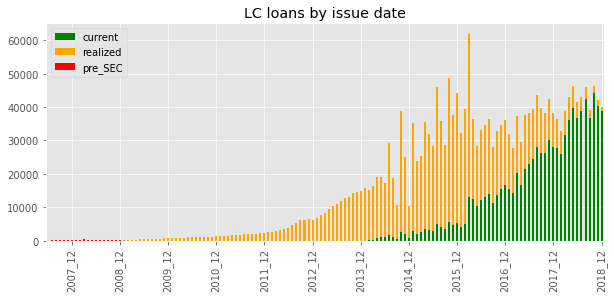

In [16]:
# visualize loan composition
ym_total.loc[:,['current','realized', 'pre_SEC']].\
    plot.bar(stacked=True, color=['green', 'orange', 'red'], figsize=(10,4))
plt.title('LC loans by issue date')
plt.legend(loc='upper left')
locs = np.arange(6,140, step=12) # x tick locations
plt.xticks(locs, np.array(ym)[locs], rotation="vertical" )
plt.show()

Lending Club registered its first prospectus with the SEC in October 2008. Assume consistent client onboarding and risk assessment started in January 2009, remove all earlier loans (0.22% of all loans). This will also take care of some of the missing data.

In [17]:
# Remove pre-SEC loans
# Remove current loans
df = df[years>=2009]
df = df[~df.loan_status.isin(current_loans)]

In [18]:
df.shape

(1345103, 40)

In [19]:
# sort by issue date (to be used in the train/test split later on)
df.sort_values(by='issue_d', inplace=True)

# check the oldest and the newest issue dates
print(min(df.issue_d))
print(max(df.issue_d))

2009-01-01 00:00:00
2018-12-01 00:00:00


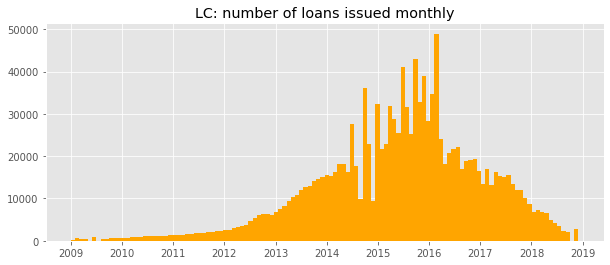

In [20]:
# Visualize the remaining loans
plt.figure(figsize=(10,4))
plt.hist(df.issue_d, bins=120, color='orange')
plt.title('LC: number of loans issued monthly')
plt.show()

## Targets

In [21]:
# do not produce numpy targets yet b/c dataframe rows will be modified
good_loans = ['Fully Paid', 'Does not meet the credit policy. Status:Fully Paid']
df['_good'] = df.loan_status.isin(good_loans).astype(int)

In [22]:
df._good.value_counts(dropna=False, normalize=True)

1    0.800234
0    0.199766
Name: _good, dtype: float64

## Missing imputation

The nature of most missing data:
- missing joint application fields for indiv.app.
- missing optional textual descriptions/titles

In [23]:
missing = df.isna().sum().sort_values(ascending=False)
missing = missing[missing>0].reset_index()
missing

,index,0
0,verification_status_joint,1319502
1,dti_joint,1319300
2,annual_inc_joint,1319297
3,desc,1222129
4,emp_title,85799
5,emp_length,78550
6,title,16660
7,last_pymnt_d,2322
8,revol_util,853
9,dti,374


In [24]:
# desc, emp_title, title
# all these strings are optional. Replace NaN with empty string
# these fields will NOT be treated as categorical (potentially, desc can be input for NLP)
# in contrast, 'purpose' is mandatory, has 14 fixed categories and will be dummified
df.desc.fillna('', inplace=True)
df.emp_title.fillna('', inplace=True)
df.title.fillna('', inplace=True)

In [25]:
# last_pymnt_d is missing only for charged-off and Late 31-120 
# However, 61% of such loans have non-zero total payments (recoveries)
# so there HAS to be a last payment date - important for return regression
# A simplifying assumption is made that in such case, last_pymnt_d ~ last_credit_pull_d

print(df[df.last_pymnt_d.isna()]['loan_status'].value_counts())
df.last_pymnt_d = np.where(df.last_pymnt_d.isna(), df.last_credit_pull_d, df.last_pymnt_d)

# convert date fields to datetime
df.last_pymnt_d = df.last_pymnt_d.apply(make_dateval)
df.earliest_cr_line = df.earliest_cr_line.apply(make_dateval)

Charged Off                                            2312
Does not meet the credit policy. Status:Charged Off      10
Name: loan_status, dtype: int64


In [26]:
# revol_util is NaN for many revol_bal=0 but not only
# assume that revol_util=0, basically unutilized revolving balance
df.revol_util.fillna(0, inplace=True)

In [27]:
# the only missing zip_code comes from AL, impute one of AL zip_codes
df.zip_code.fillna('355xx', inplace=True)

In [28]:
# Joint Applications
# when the loan is joint (legally, a joint obligation), the joint numbers supercede the single numbers :
#    dti_joint  --> if exists, replace dti  
#    annual_inc_joint --> if exists, replace annual_inc
#    verification_status_joint --> if exists AND is 'verified', replace verification_status 

df.dti = np.where(df.application_type=='Joint App', df.dti_joint, df.dti)
df.annual_inc = np.where(df.application_type=='Joint App', df.annual_inc_joint, df.annual_inc)
df.verification_status = np.where(df.verification_status_joint=='Verified', 
                                  df.verification_status_joint, df.verification_status)

# 3 loans have neither dti nor dti_joint, drop them
df[df.dti.isna()]
df = df[~df.dti.isna()]

In [29]:
df.emp_length.value_counts(dropna=False)

10+ years    442174
2 years      121732
< 1 year     107876
3 years      107613
1 year        88407
5 years       84185
4 years       80557
NaN           78550
6 years       62725
8 years       60704
7 years       59623
9 years       50954
Name: emp_length, dtype: int64

In [30]:
# For missing emp.length, assume it's roughly equivalent to years since earliest credit card
def distance_years(distance):
    if distance>=10:   return '10+ years'
    elif distance <1:  return '< 1 year'
    else:              return f'{int(distance)} years'

credit_history = np.round((df.issue_d - df.earliest_cr_line) / np.timedelta64(1,'Y'))
df.emp_length = np.where(df.emp_length.isna(), 
                         np.vectorize(distance_years)(credit_history), 
                         df.emp_length)

In [31]:
# drop the remaining columns with NaN which have been used to populate other fields
df.drop(['verification_status_joint', 'dti_joint', 'annual_inc_joint', 'last_credit_pull_d'], inplace=True, axis=1)

In [32]:
# verify there are no NaNs left
print(df.isna().sum().sum())
df.shape

0


(1345100, 37)

## Finalize dataframe

Create 2 new features: description flag and credit history years

In [33]:
# create a new field 'has description' (proxy for extra transparency?)
df['_has_desc'] = np.vectorize(len)(df.desc)>0
df._has_desc = df._has_desc.astype(int)
# create a new field for credit history in Years
df['_credit_hist'] = credit_history

In [34]:
# break into ordinal and nominal for one-hot encoding
ordinal = [
    'application_type', 
    'grade',
    'sub_grade',
    'term',
    'initial_list_status',  # LC claims this is purely random: chi2 test dsiproves that!
    'emp_length',
    'verification_status',
    '_has_desc',
]

In [35]:
# replace minor home ownership categories with OTHER
df.home_ownership.replace({'ANY':'OTHER', 'NONE':'OTHER'}, inplace=True)

nominal = [
  'purpose',
  'addr_state', # if linear models do not pick up this feature, revisit amd remove dummies (probably too much noise)
  'home_ownership',
  'disbursement_method', #highly imbalanced and probably irrelevant
]

In [36]:
numeric = [
    'loan_amnt', # numeric
    'int_rate',  # numeric
    'installment',  # numeric
    'annual_inc', # numeric
    'fico_range_low', 
    'delinq_2yrs',# numeric
    'dti', # numeric
    'open_acc', # numeric
    'pub_rec', # numeric
    'revol_bal', # numeric
    'revol_util', # numeric
    '_credit_hist', # new numeric
]
print(len(numeric))

12


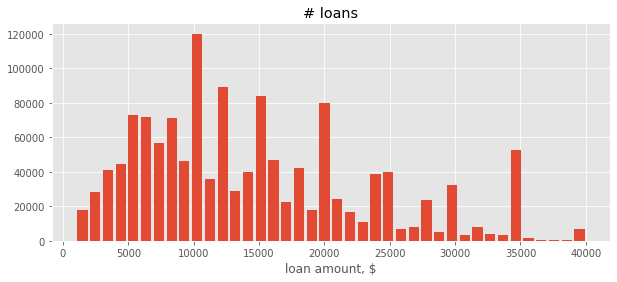

In [37]:
# explore the distribution of loan amount to decide whether to take a log
# conclusion: do not log b/c log_amount is left skewed (overcompensates)
# NB. spikes at ~round numbers (10K, 20K, 35K)
plt.figure(figsize=(10,4))
plt.hist(df.loan_amnt, bins=40,rwidth=.8)
plt.xlabel('loan amount, $')
plt.title('# loans')
plt.show()

In [38]:
# check the integrity of numeric columns
for f in numeric:
    print(f'{f} \t{df[f].dtype} \t{df[f].isna().sum()}')

loan_amnt 	float64 	0
int_rate 	float64 	0
installment 	float64 	0
annual_inc 	float64 	0
fico_range_low 	float64 	0
delinq_2yrs 	float64 	0
dti 	float64 	0
open_acc 	float64 	0
pub_rec 	float64 	0
revol_bal 	float64 	0
revol_util 	float64 	0
_credit_hist 	float64 	0


In [39]:
# convert 'id' to numeric and set as index 
df['id'] = df['id'].astype(int)
df.set_index('id', inplace=True)

print(df.shape)

(1345100, 38)


## Save dataframe

In [40]:
save_df = False

if save_df:
    timestamp = int(time.time())

    # save dataframe
    df.to_csv(path+f'features/df_{timestamp}.csv', index=False)

    # verify integrity
    df = pd.read_csv(path+f'features/df_{timestamp}.csv')
    df.set_index('id', inplace=True)
    df.sample(3)

## Visualize

### Categorical

In [41]:
def plot_categorical(f):
    _,axes = plt.subplots(1, 2, figsize=(14, 4))
    ax0,ax1=axes[0],axes[1]

    distr = df.groupby(f).count()._good
    ax0.bar(distr.index, distr.values)
    rot=0 if len(distr)<8 else 90
    for pos, val in enumerate(distr.values):
        ax0.text(pos, 1.02*val, f'{int(val/1000):,}', rotation=rot, color='k', ha='center')
    ax0.set_title('# of loans per category, thousands')
    plt.setp( ax0.xaxis.get_majorticklabels(), rotation=rot )
    ax0.set_xlabel(f)

    distr = df.groupby(f)._good.mean().sort_values(ascending=False)
    ax1.bar(distr.index, distr.values)
    rot=0 if len(distr)<8 else 90
    for pos, val in enumerate(distr.values):
        ax1.text(pos, 1.02*val, f'{val:.3f}', rotation=rot, color='k', ha='center')
    ax1.set_ylim(0,1)
    ax1.set_title('Share of good loans')
    plt.setp(ax1.xaxis.get_majorticklabels(), rotation=rot )
    ax1.set_xlabel(f)

    plt.show()


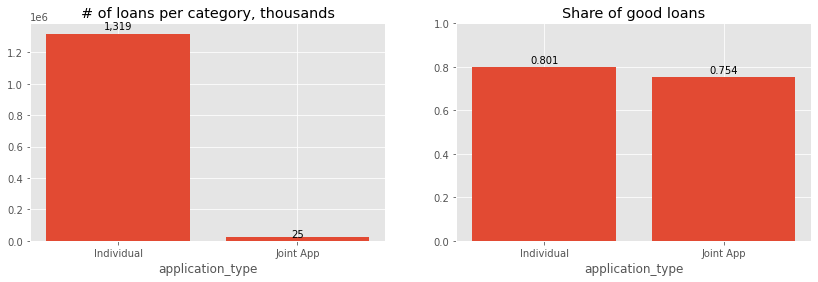

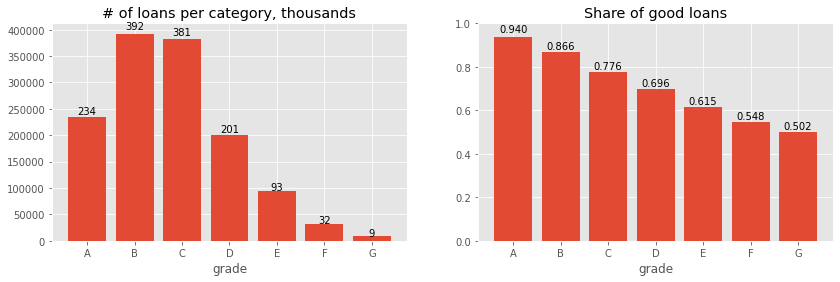

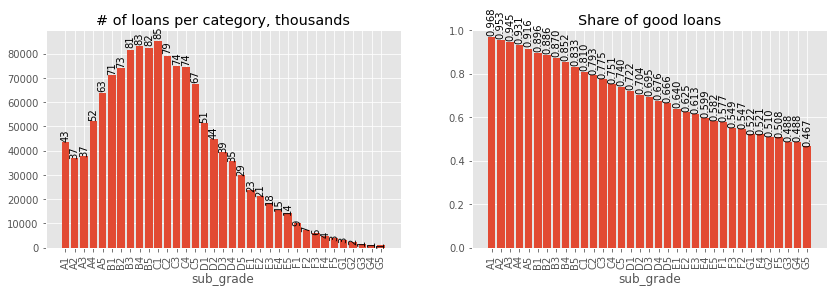

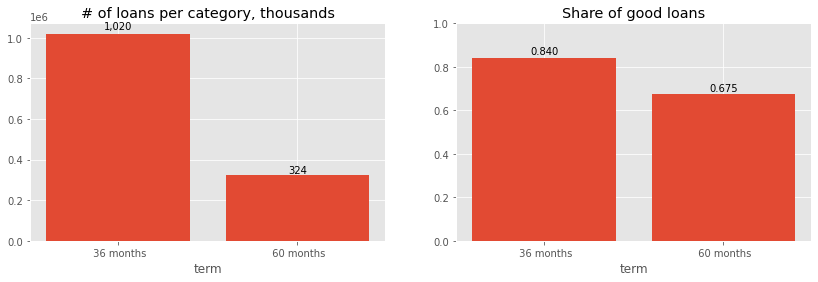

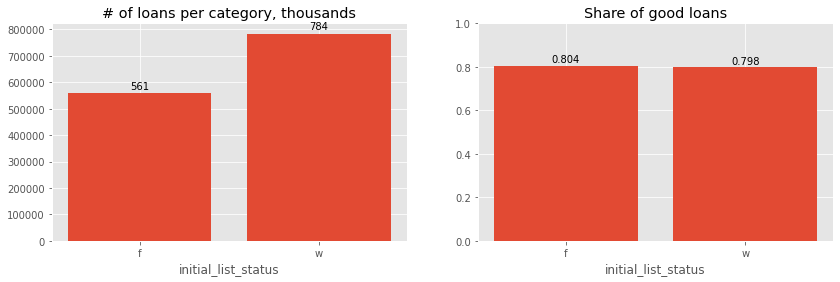

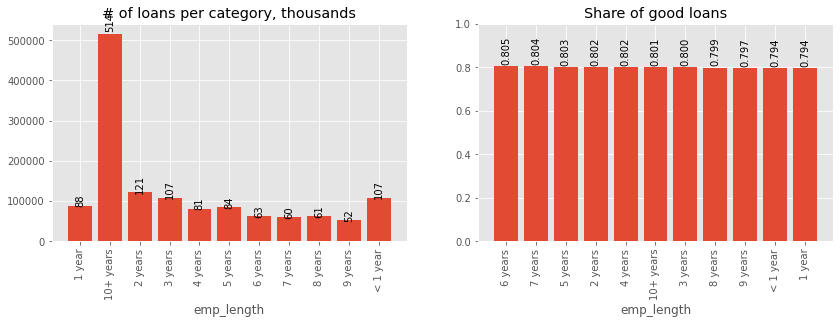

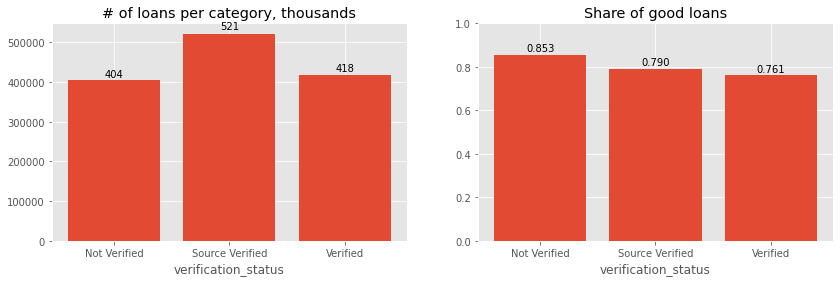

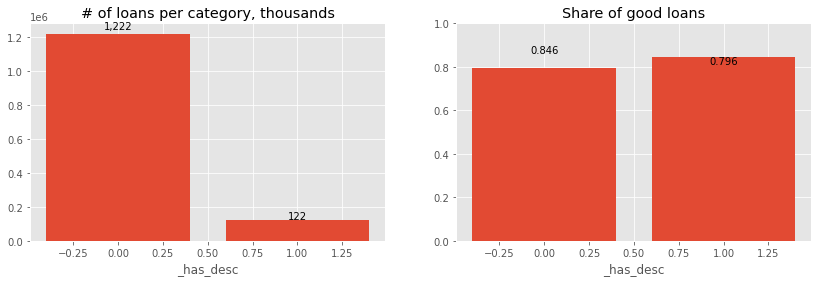

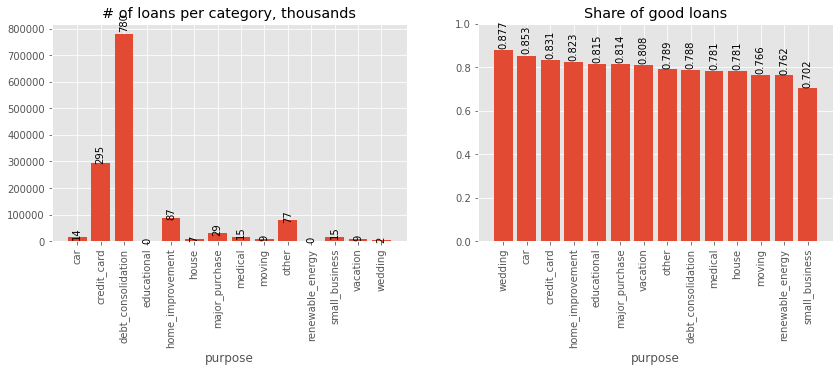

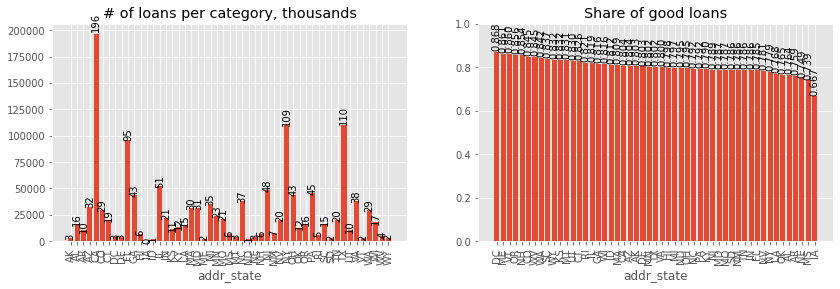

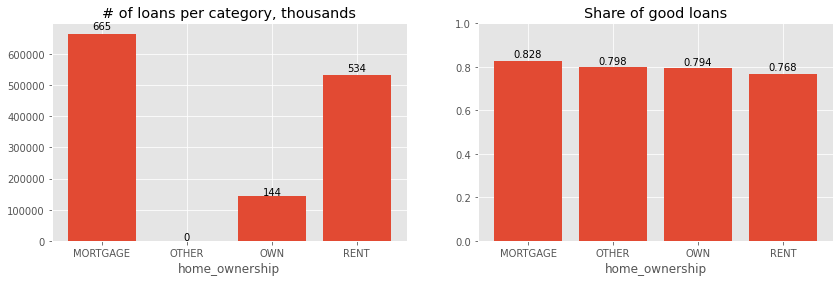

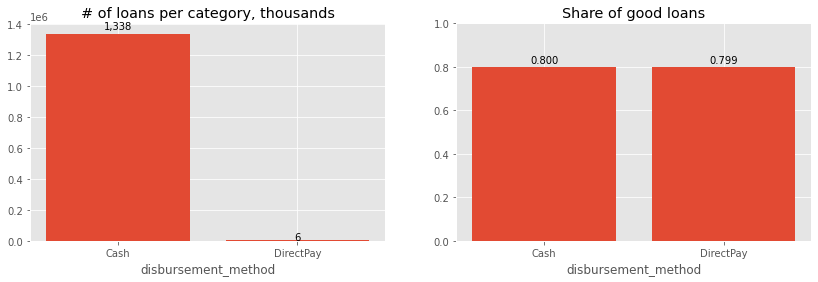

In [42]:
for f in ordinal+nominal:
    plot_categorical(f)

The following fields probably do not influence the default probability. Verify by chi_square tests:
- initial_list_status
- disbursement_method
- emp_length

In [43]:
p_values=[]
for f in ordinal+nominal:
    tab = pd.crosstab(df._good, df[f])
    p_values.append(scipy.stats.chi2_contingency(tab)[1])
sorted(list(zip(ordinal+nominal, p_values)), key=lambda x:x[1])

[('grade', 0.0),
 ('sub_grade', 0.0),
 ('term', 0.0),
 ('verification_status', 0.0),
 ('_has_desc', 0.0),
 ('purpose', 0.0),
 ('addr_state', 0.0),
 ('home_ownership', 0.0),
 ('application_type', 9.776366888251107e-79),
 ('initial_list_status', 6.894830033693952e-16),
 ('emp_length', 6.463066794700236e-11),
 ('disbursement_method', 0.8536480230498579)]

In [44]:
# conclusion: only the disbursement_method is irrelevant, drop the feature
nominal.remove('disbursement_method')

# the state information does not add value, AUC/precision metrics do not change
# remove especially b/c 50 one-hot columns
nominal.remove('addr_state')

### Numeric

In [45]:
def plot_numeric(f):
    _,axes = plt.subplots(1, 2, figsize=(14, 4))
    ax0,ax1=axes[0],axes[1]

    ax0.hist(df[f], bins=40)
    ax0.set_title(f'{f} distribution')
    ax0.set_xlabel(f)

    ax1 = sns.violinplot(f,'_good',data=df, orient='h')
    ax1.set_title(f'{f} vs default')
    ax1.set_xlabel(f)

    plt.show()


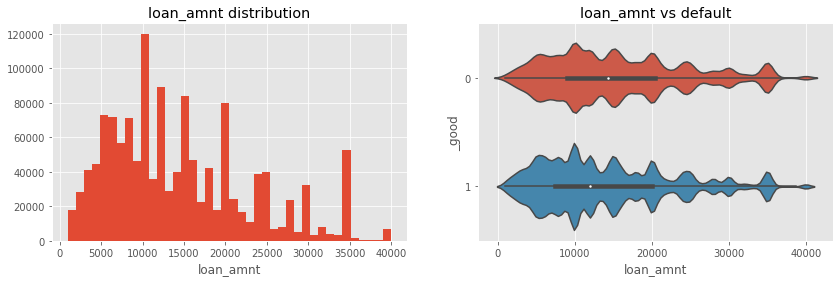

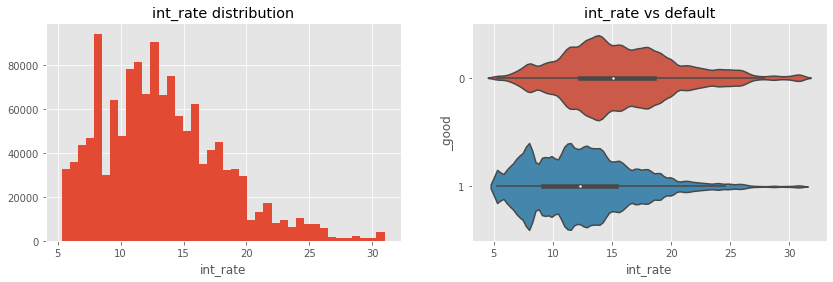

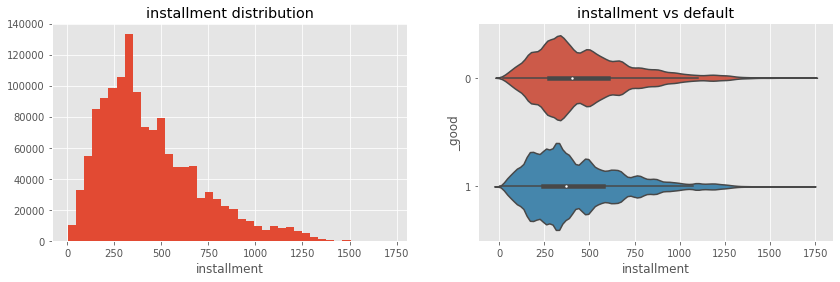

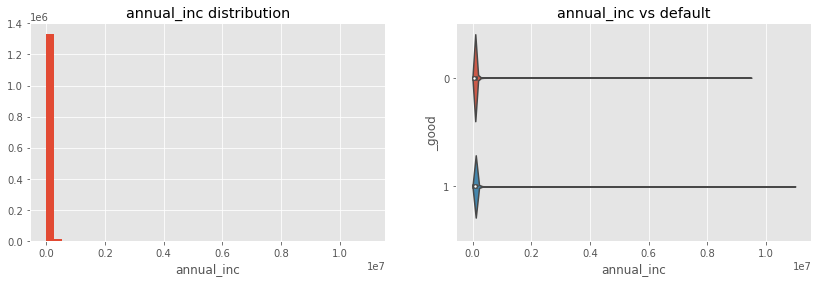

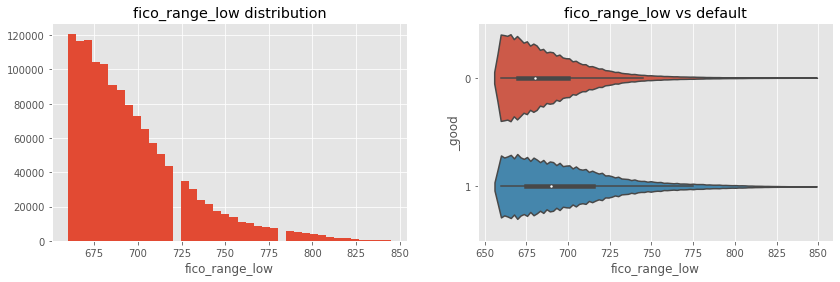

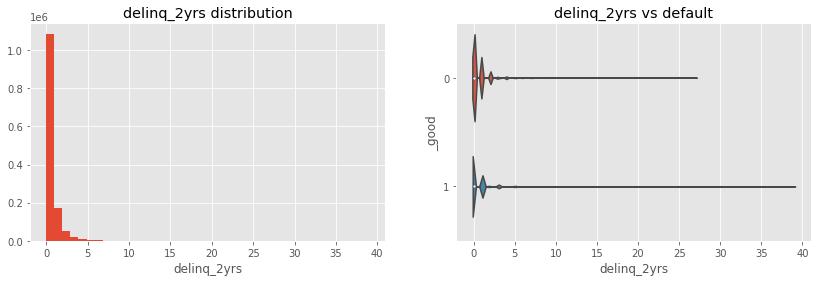

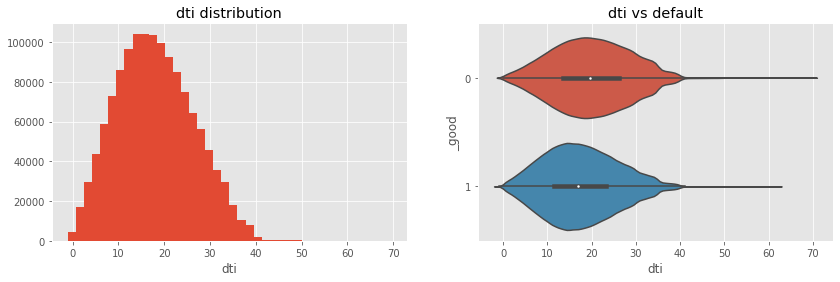

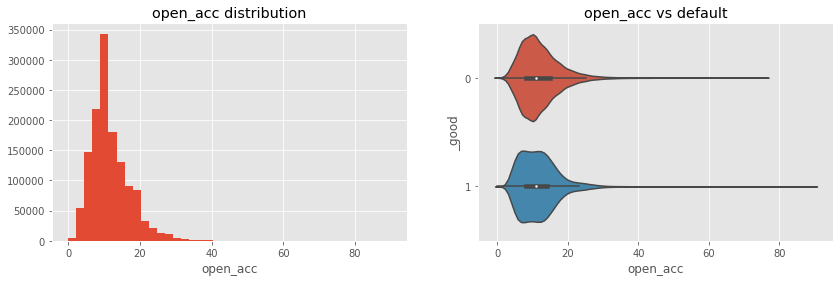

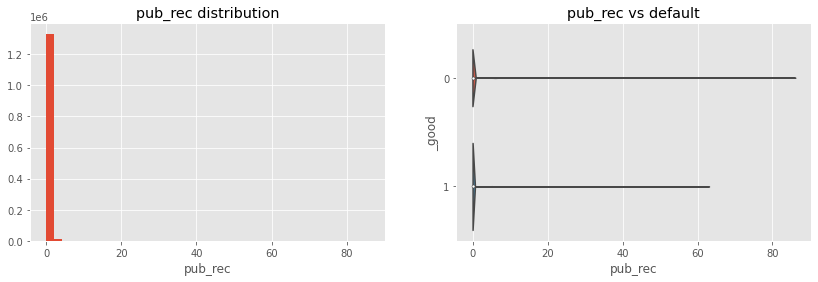

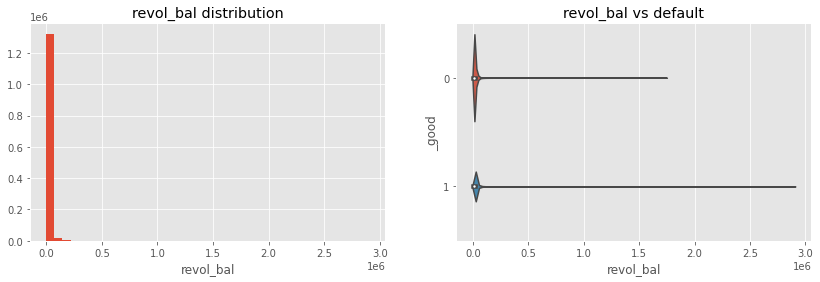

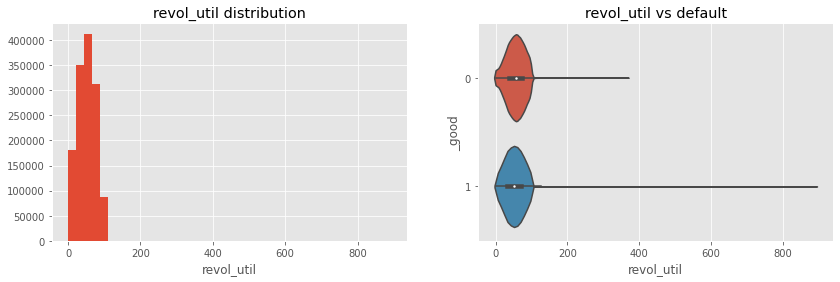

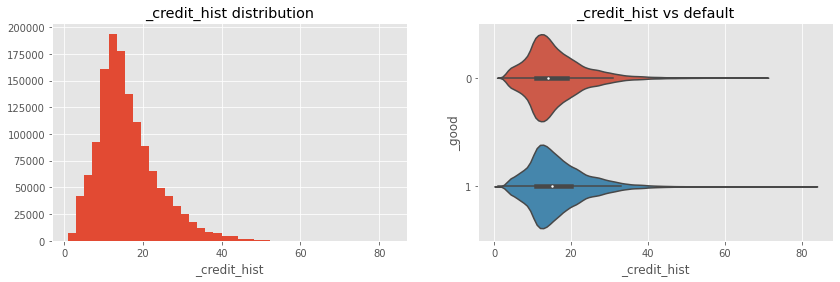

In [46]:
for f in numeric:
    plot_numeric(f)

### Grades stats

In [47]:
col = 'sub_grade'
grade_dict = {
'% Good': df.groupby(col)._good.mean(),
'Loan Amount': df.groupby(col).loan_amnt.mean(),
'FICO low': df.groupby(col).fico_range_low.mean(),
'Ann.Income': df.groupby(col).annual_inc.mean(),
'Int.Rate': df.groupby(col).int_rate.mean(),
'DTI': df.groupby(col).int_rate.mean(),
'Description': df.groupby(col)._has_desc.mean(),
'Cred.History': df.groupby(col).dti.mean(),
}


In [48]:
grade_df = pd.DataFrame(grade_dict)
grade_df

,% Good,Loan Amount,FICO low,Ann.Income,Int.Rate,DTI,Description,Cred.History
sub_grade,,,,,,,,
A1,0.967728,14028.207169,749.789281,100248.883068,5.537729,5.537729,0.074210,14.046710
A2,0.953295,13393.868344,736.676947,90349.848227,6.520464,6.520464,0.091551,15.070013
A3,0.944951,13626.478424,727.124657,89523.618445,7.117663,7.117663,0.108013,15.683383
A4,0.931308,14063.614659,720.185153,87047.284750,7.511228,7.511228,0.120872,15.809045
A5,0.915890,14143.523267,713.058153,85445.606949,8.199659,8.199659,0.109035,16.303580
B1,0.895670,13222.709306,703.639791,82034.847452,8.904606,8.904606,0.092401,16.521969
B2,0.886481,13317.247244,699.856428,79488.735701,9.907699,9.907699,0.110273,16.853700
B3,0.870183,13484.512176,697.611453,77507.824765,10.750244,10.750244,0.125818,17.229514
B4,0.851633,13281.970954,694.533225,75200.375813,11.495142,11.495142,0.112382,17.459893


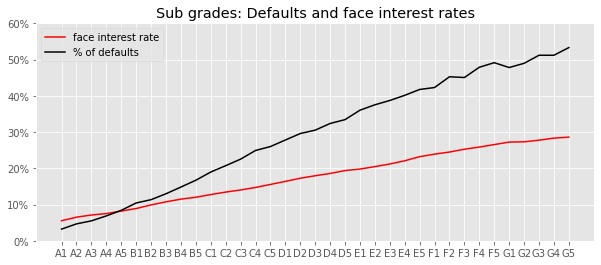

In [49]:
def plot_sub_grade_stats(grade_df):
    fig = plt.figure(figsize=(10,4))
    ax = fig.add_subplot(111)

    # ax.axhline(0, color='grey')
    # irr_mean = report_df[f'mean_B{B}']
    # irr_std  = report_df[f'std_B{B}']
    
    ax.plot(grade_df['Int.Rate']/100, color='r', label='face interest rate')
    ax.plot(1-grade_df['% Good'], color='k', label='% of defaults')
    
    
    # ax.fill_between(range(len(sub_grades)), 
    #                 irr_mean-2*irr_std, 
    #                 irr_mean+2*irr_std, color='red', alpha=.2)
    ax.set_xticks(grade_df.index)
    ax.set_ylim([0,0.6])
    ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
    ax.set_title('Sub grades: Defaults and face interest rates')
    ax.legend(loc='upper left')
    plt.show()
plot_sub_grade_stats(grade_df)    

## X,Y: train/test split

In [50]:
print(df.shape)
print(df.columns)

(1345100, 38)
Index(['issue_d', 'desc', 'title', 'application_type', 'purpose', 'grade',
       'sub_grade', 'term', 'loan_amnt', 'int_rate', 'installment',
       'initial_list_status', 'disbursement_method', 'addr_state', 'zip_code',
       'home_ownership', 'emp_length', 'emp_title', 'annual_inc',
       'verification_status', 'fico_range_high', 'fico_range_low',
       'delinq_2yrs', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'loan_status', 'funded_amnt', 'total_pymnt',
       'last_pymnt_d', 'recoveries', 'year_months', '_good', '_has_desc',
       '_credit_hist'],
      dtype='object')


In [51]:
Y = df['_good']
X = df[nominal + ordinal + numeric]

X.sample(5)

,purpose,home_ownership,application_type,grade,sub_grade,term,initial_list_status,emp_length,verification_status,_has_desc,loan_amnt,int_rate,installment,annual_inc,fico_range_low,delinq_2yrs,dti,open_acc,pub_rec,revol_bal,revol_util,_credit_hist
id,,,,,,,,,,,,,,,,,,,,,,
22061442,debt_consolidation,MORTGAGE,Individual,C,C3,36 months,f,10+ years,Verified,0,8500.0,13.98,290.43,62000.0,695.0,0.0,7.55,10.0,1.0,10110.0,44.3,20.0
47634361,debt_consolidation,RENT,Individual,D,D1,36 months,f,< 1 year,Not Verified,0,3600.0,15.61,125.88,25210.0,680.0,0.0,24.24,8.0,0.0,7545.0,81.1,8.0
32919813,home_improvement,MORTGAGE,Individual,D,D1,60 months,w,3 years,Source Verified,0,10500.0,15.61,253.17,25000.0,660.0,1.0,34.69,13.0,0.0,1929.0,48.2,5.0
3642142,credit_card,MORTGAGE,Individual,B,B2,36 months,f,10+ years,Verified,1,24000.0,11.14,787.33,145000.0,670.0,0.0,7.45,15.0,0.0,34137.0,59.6,16.0
1035051,credit_card,MORTGAGE,Individual,B,B2,36 months,f,10+ years,Source Verified,0,2800.0,10.65,91.21,136000.0,705.0,0.0,10.83,8.0,0.0,28614.0,77.3,21.0


1. Convert Ordinal to numeric

In [52]:
sub_grades = sorted(df.sub_grade.unique())
sub_grades_dict = {x:sub_grades.index(x)+1 for x in sub_grades}  # map 'A1' to 1 rather than 0
sub_grades_dict_reverse = {v:k for k,v in sub_grades_dict.items()} # for visual purposes, need later

emp_length_dict =  {'< 1 year':0, '1 year':1, '2 years':2, '3 years':3, '4 years':4, '5 years':5, 
                    '6 years':6, '7 years':7, '8 years':8, '9 years':9, '10+ years':10,}
ordinal_dict = {
    'application_type': {'Individual':0, 'Joint App':1},
    'grade':   {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7},
    'sub_grade': sub_grades_dict,
    'term': {' 36 months':0, ' 60 months':1},
    'initial_list_status': {'w':0, 'f':1}, 
    'emp_length': emp_length_dict,
    'verification_status': {'Not Verified':0, 'Source Verified':1, 'Verified':2},  #'source verified' is a softer check
    '_has_desc': {False:0, True:1}
}

for f in ordinal:
    X[f].replace(ordinal_dict[f], inplace=True)

X.sample(5)

,purpose,home_ownership,application_type,grade,sub_grade,term,initial_list_status,emp_length,verification_status,_has_desc,loan_amnt,int_rate,installment,annual_inc,fico_range_low,delinq_2yrs,dti,open_acc,pub_rec,revol_bal,revol_util,_credit_hist
id,,,,,,,,,,,,,,,,,,,,,,
100026420,credit_card,RENT,0,1,1,0,1,3,0,0,7000.0,5.32,210.81,75000.0,690.0,0.0,29.30,20.0,0.0,30726.0,44.8,11.0
119706599,other,RENT,0,2,9,0,1,5,1,0,5000.0,10.91,163.49,65000.0,700.0,0.0,30.17,14.0,1.0,6639.0,26.6,16.0
49864599,home_improvement,MORTGAGE,0,2,10,0,0,7,2,0,15000.0,11.53,494.86,45661.0,705.0,0.0,0.50,4.0,0.0,19.0,0.1,14.0
66340833,debt_consolidation,OWN,0,1,2,0,0,10,1,0,20000.0,6.24,610.62,49800.0,730.0,0.0,13.37,10.0,0.0,20679.0,30.6,25.0
69371648,home_improvement,MORTGAGE,0,1,1,0,0,10,1,0,8000.0,5.32,240.92,350000.0,720.0,0.0,15.24,11.0,0.0,107002.0,37.9,36.0


2. Dummify the Nominal

In [53]:
# verify the object types:
for f in nominal:
    assert X[f].dtype=='object'
for f in ordinal+numeric:
    assert X[f].dtype!='object'

# dummify
X = pd.get_dummies(X, columns=nominal,  drop_first=True)

print(X.shape)
assert X.shape[0]==Y.shape[0]
X.sample(5)

(1345100, 36)


,application_type,grade,sub_grade,term,initial_list_status,emp_length,verification_status,_has_desc,loan_amnt,int_rate,installment,annual_inc,fico_range_low,delinq_2yrs,dti,open_acc,pub_rec,revol_bal,revol_util,_credit_hist,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
94781121,0,3,12,0,0,4,0,0,21925.0,13.49,743.93,77457.0,705.0,0.0,16.25,12.0,0.0,6095.0,24.2,14.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
95196406,0,3,14,0,0,10,1,0,11200.0,14.99,388.20,44000.0,685.0,1.0,11.97,8.0,0.0,9680.0,64.5,13.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2094082,0,3,12,0,1,1,2,1,10000.0,15.31,348.18,62000.0,695.0,0.0,31.88,15.0,0.0,17280.0,92.9,9.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
107913258,0,1,2,0,0,2,1,0,30000.0,7.07,927.28,115500.0,765.0,0.0,15.62,13.0,0.0,25695.0,31.8,24.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
109061945,0,1,1,0,0,2,1,0,20000.0,5.32,602.30,230000.0,750.0,0.0,2.15,9.0,0.0,11569.0,22.8,21.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Select between testing on the most recent loans vs random sampling across dates

In [56]:
test_mode = 'recent'

if test_mode=='recent':
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

if test_mode=='random':
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2020)    

In [57]:
# (TBD: for presentation purposes, visualize the recent train/test split on a timeline)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1076080, 36)
(269020, 36)
(1076080,)
(269020,)


Verify the X_train, X_test dates (if test_mode='recent')

In [58]:
# verify the dates
df_train = df[df.index.isin(X_train.index)]
df_test = df[df.index.isin(X_test.index)]

print(min(df_train.issue_d))
print(max(df_train.issue_d))
print(min(df_test.issue_d))
print(max(df_test.issue_d))

2009-01-01 00:00:00
2016-10-01 00:00:00
2016-10-01 00:00:00
2018-12-01 00:00:00


In [59]:
print(max(df_train.last_pymnt_d))
print(max(df_test.last_pymnt_d))

2019-03-01 00:00:00
2019-03-01 00:00:00


For random sampling, the % of default is identical to total population:
- 0.80042, 0.19958

The most recent loans, however, skew this proportion towards defaulted loans b/c they are more likely to 'develop' the target variable before maturity:
- 0.782146, 0.217854

We have to be careful in interpreting the ROC curve for the most recent test set. Possible solution: slight upsampling of the recent good loans.

## Save Train/Test

In [60]:
def save_features(X_train, X_test, Y_train, Y_test, test_mode):
    timestamp = int(time.time())
    X_train.to_csv(path+f'features/X_train_{test_mode}_{timestamp}.csv')
    X_test.to_csv(path+f'features/X_test_{test_mode}_{timestamp}.csv')
    Y_train.to_csv(path+f'features/Y_train_{test_mode}_{timestamp}.csv')
    Y_test.to_csv(path+f'features/Y_test_{test_mode}_{timestamp}.csv')    
# save_features(X_train, X_test, Y_train, Y_test, test_mode)    